In [4]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
pwd = os.getcwd()
filepath = os.path.join(pwd, "housing.csv")
filepath

'c:\\Users\\sujoy\\MLProjects\\MLlabs\\Scripts\\Hands_on_ML\\housing.csv'

In [6]:
h_data = pd.read_csv(filepath)
h_data
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<Axes: ylabel='ocean_proximity'>

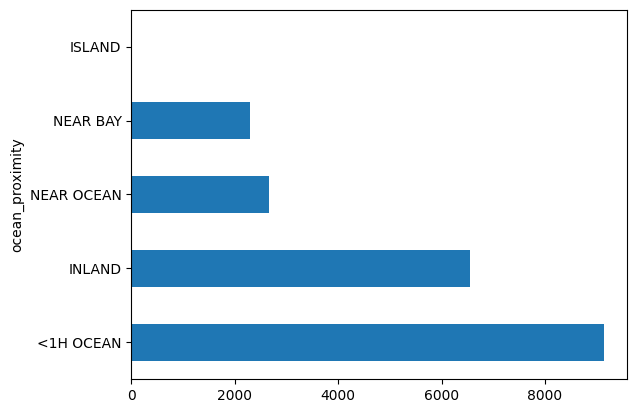

In [7]:
h_data["ocean_proximity"].value_counts().plot(kind="barh")

In [10]:
h_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: >

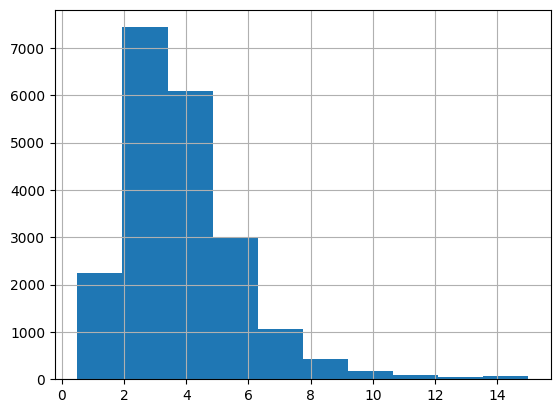

In [11]:
h_data["median_income"].hist()

In [12]:
h_data["income_cat"]=pd.cut(h_data["median_income"], bins=[0,1.5,3.0,4.5,6,np.inf], labels=[1,2,3,4,5])
h_data["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

<Axes: >

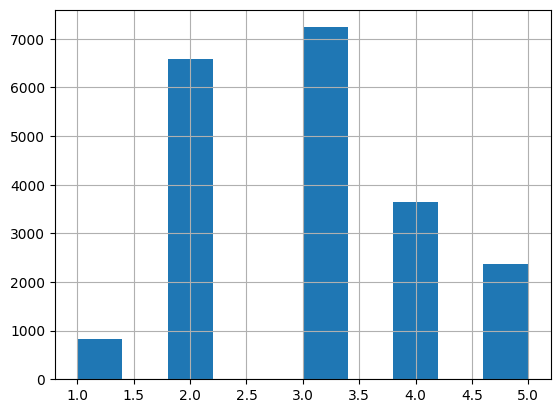

In [13]:
h_data["income_cat"].hist()

In [14]:
y = h_data["median_house_value"]
X = h_data.drop("median_house_value",axis=1)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
3833,-118.44,34.20,35.0,1717.0,478.0,1628.0,495.0,2.5197,<1H OCEAN,2
6208,-117.90,34.06,33.0,1330.0,209.0,578.0,192.0,5.6406,<1H OCEAN,4
10212,-117.90,33.88,35.0,2062.0,353.0,991.0,357.0,5.2897,<1H OCEAN,4
17726,-121.80,37.32,23.0,1829.0,346.0,1277.0,324.0,4.8092,<1H OCEAN,4
5513,-118.41,33.99,36.0,1089.0,234.0,632.0,215.0,3.6538,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...
14910,-117.05,32.61,31.0,4033.0,715.0,2585.0,715.0,3.5096,NEAR OCEAN,3
7091,-118.01,33.92,35.0,1606.0,289.0,829.0,273.0,5.2730,<1H OCEAN,4
2450,-119.55,36.51,46.0,1889.0,390.0,971.0,403.0,2.2132,INLAND,2
17191,-122.38,37.18,52.0,1746.0,315.0,941.0,220.0,3.3047,NEAR OCEAN,3


<Axes: >

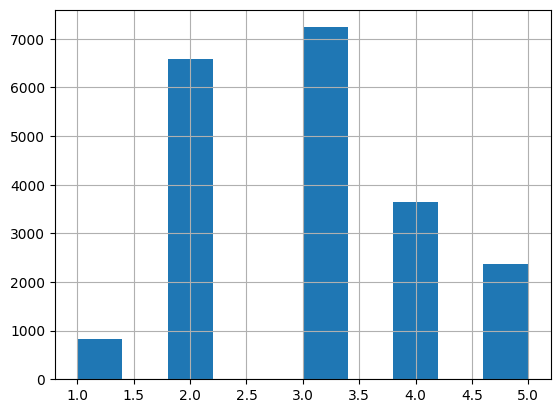

In [16]:
h_data["income_cat"].hist()

<Axes: >

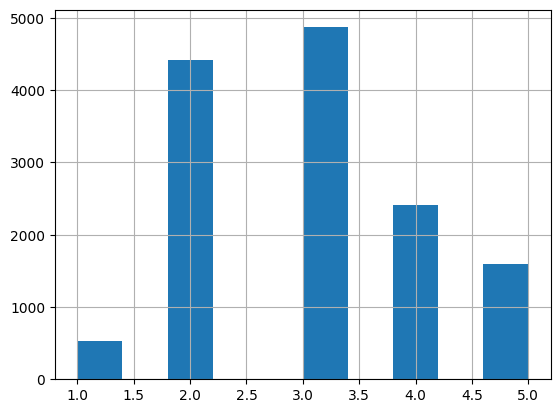

In [17]:
X_train["income_cat"].hist()

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(h_data, h_data["income_cat"]):
    strat_train_set = h_data.loc[train_index]
    strat_test_set = h_data.loc[test_index]

strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [19]:
h_data["income_cat"].value_counts() / len(h_data)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [20]:
strat_train_set.drop("income_cat", axis="columns", inplace=True)
strat_test_set.drop("income_cat", axis="columns", inplace=True)
housing = strat_test_set.copy()

# visualization of data

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

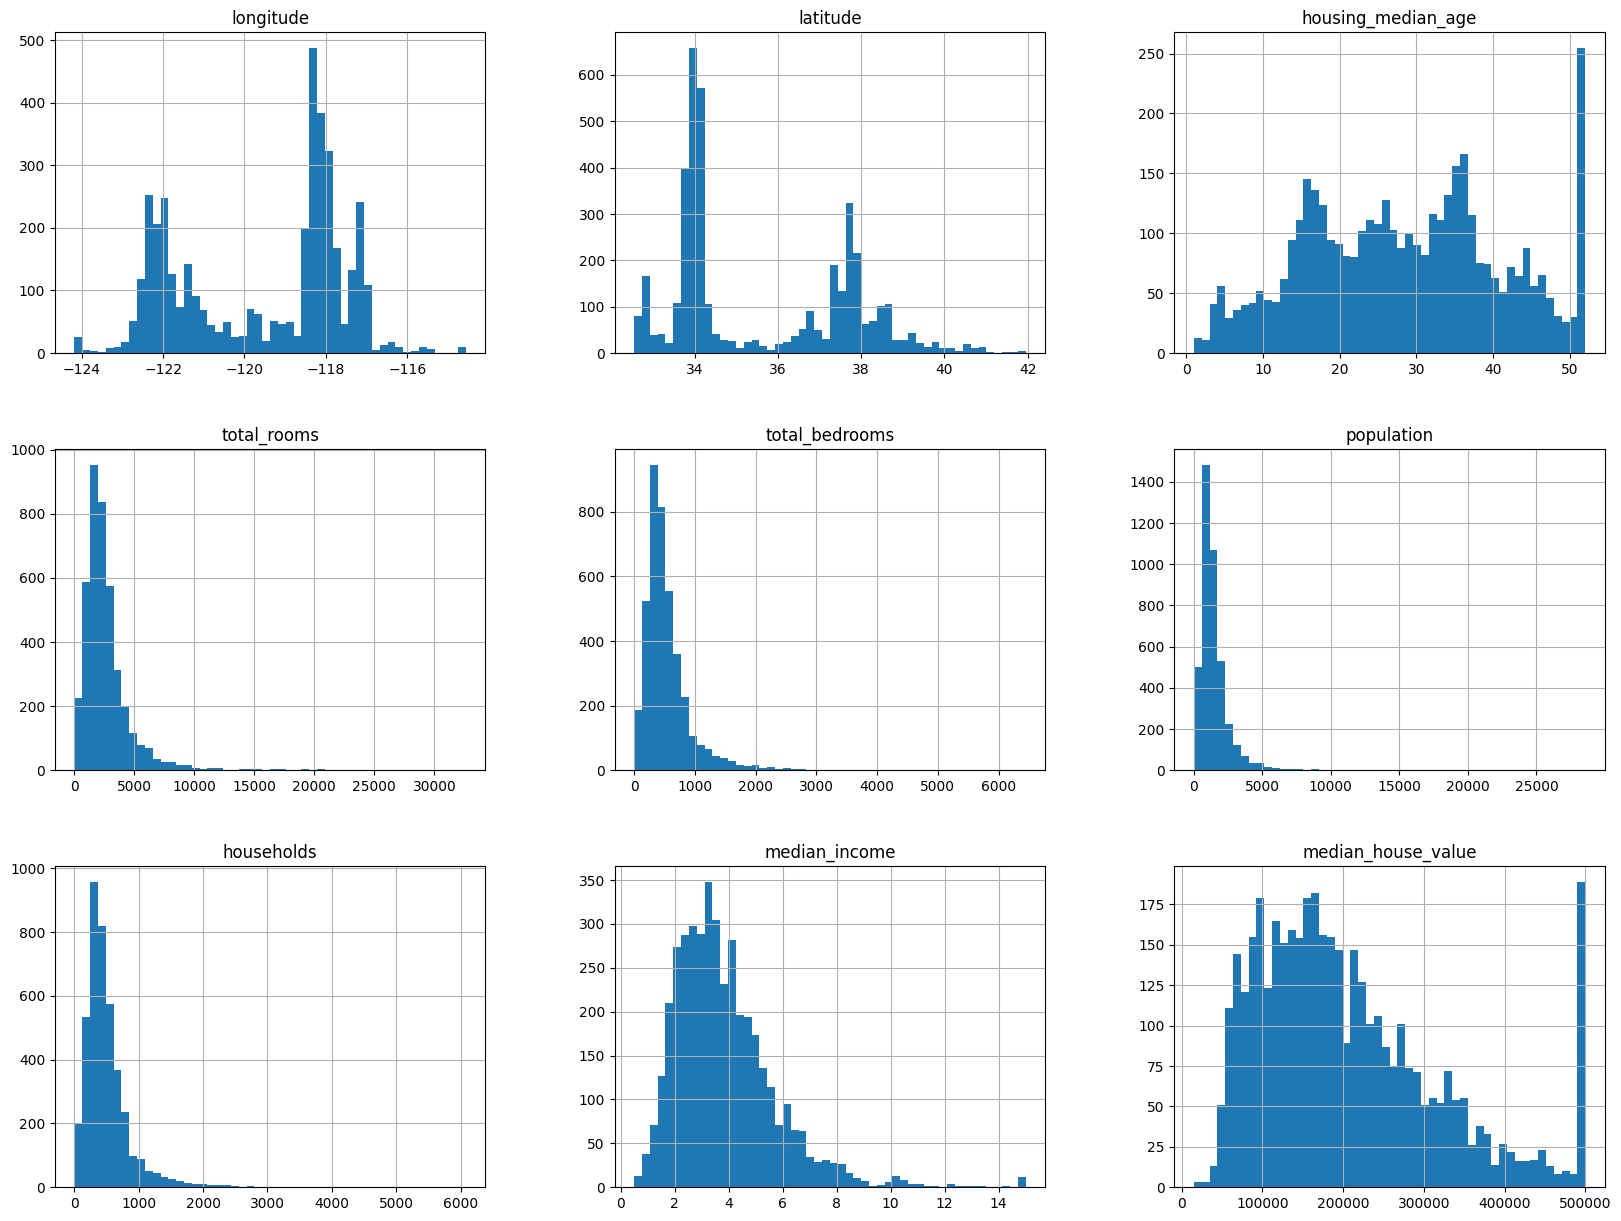

In [21]:
housing.hist(bins=50, figsize=(20, 15))

In [36]:
var=housing.select_dtypes(exclude=[object])

<Axes: >

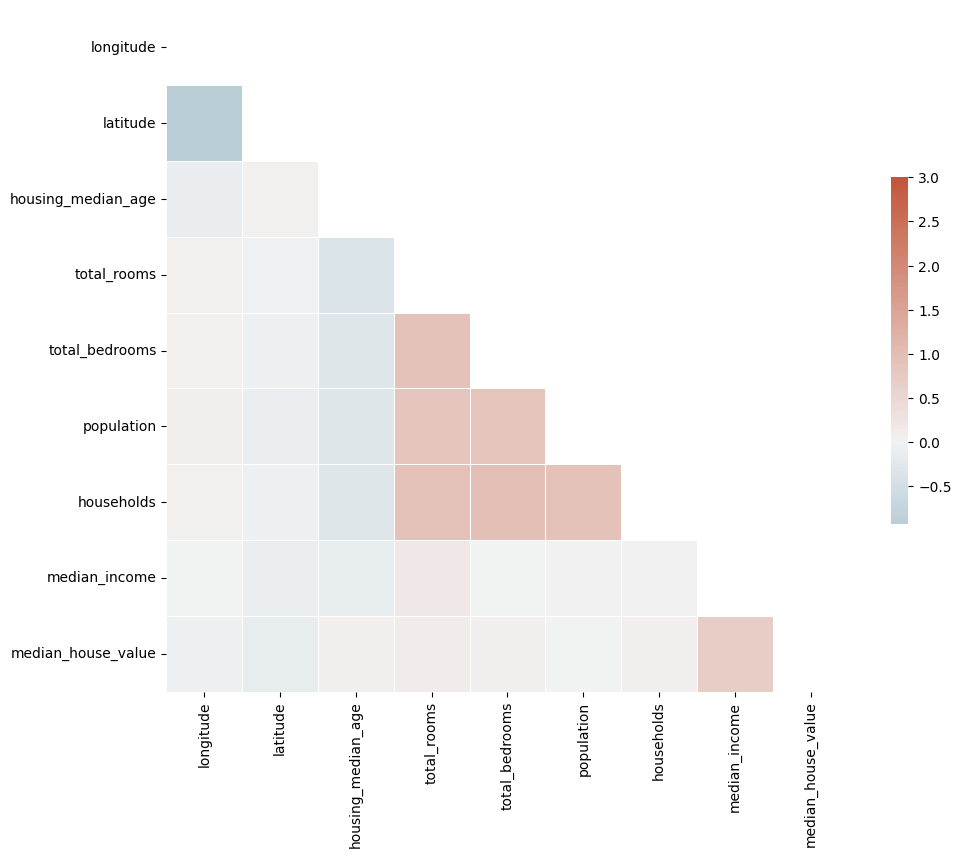

In [37]:
corr = var.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230,20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=3, center=0, 
            square=True, linewidth=.5, cbar_kws={"shrink": .5})